In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [56]:
dataframe = pd.read_csv("winequality.csv")
dataframe.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [57]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [58]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [59]:
dataframe.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [60]:
for col in dataframe.columns:
    if dataframe[col].isnull().sum() > 0:
        dataframe[col] = dataframe[col].fillna(dataframe[col].mean())

dataframe.isnull().sum().sum()

0

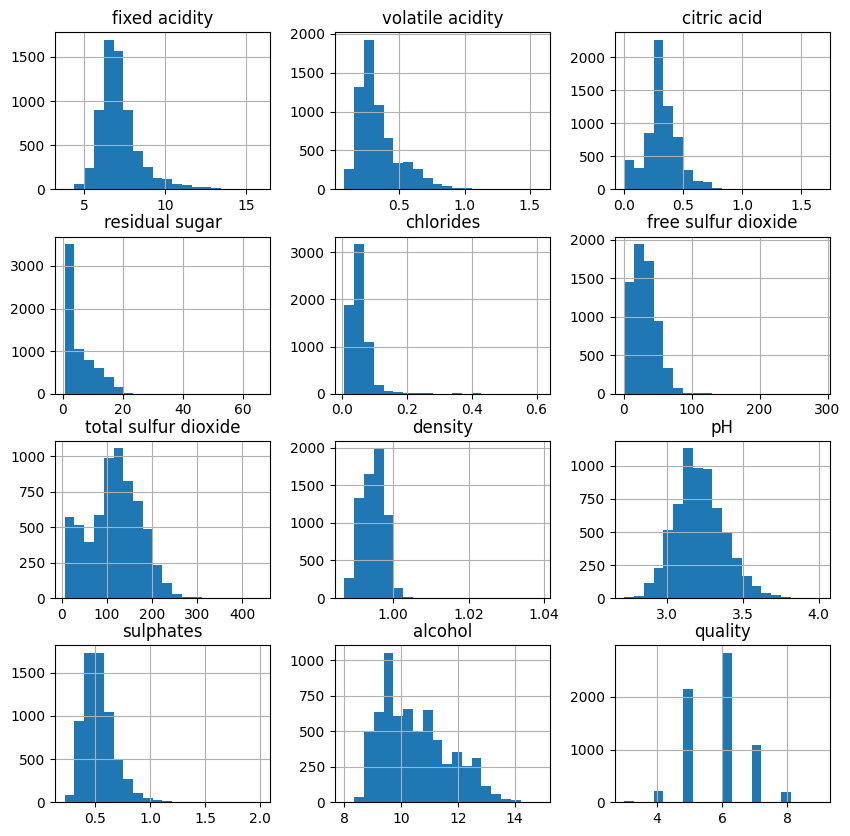

In [61]:
dataframe.hist(bins = 20, figsize = (10, 10))
plt.show()

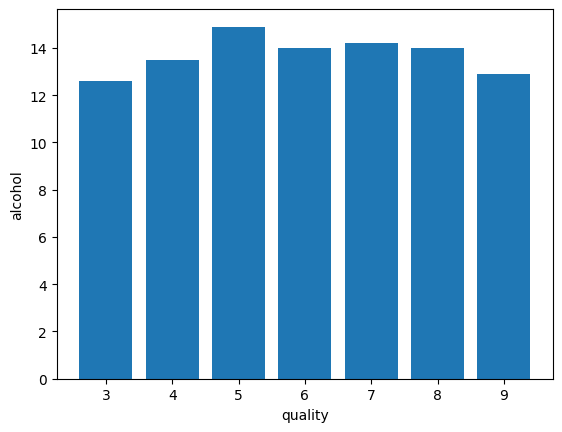

In [62]:
plt.bar(dataframe['quality'], dataframe['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

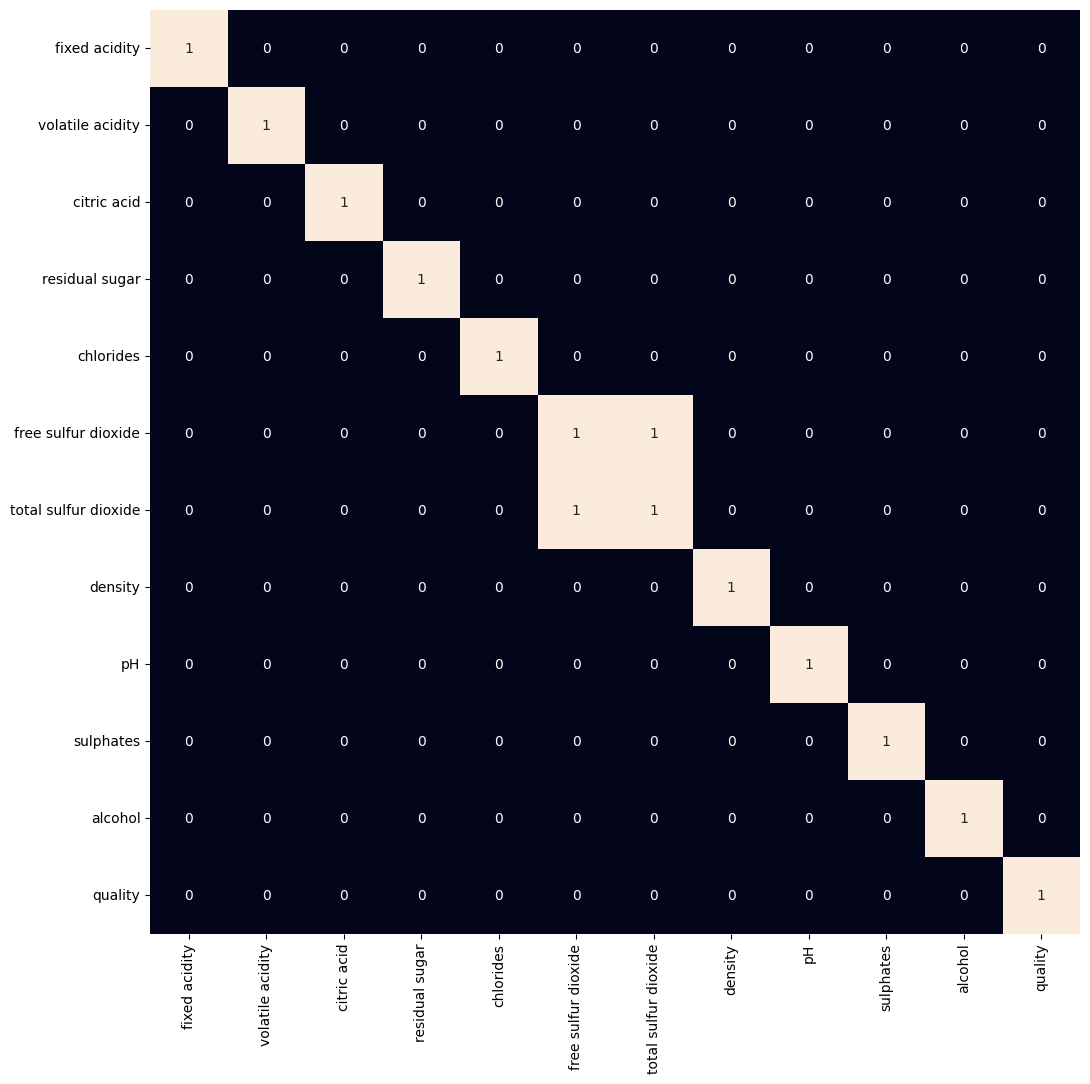

In [63]:
plt.figure(figsize = (12, 12))
range_except_date = dataframe.loc[:, dataframe.columns != 'type']
sb.heatmap(range_except_date.corr() > 0.7, annot = True, cbar = False)
plt.show()

In [64]:
dataframe = dataframe.drop('total sulfur dioxide', axis = 1)

In [65]:
dataframe = dataframe.drop('free sulfur dioxide', axis = 1)

In [66]:
dataframe.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,0.9956,3.19,0.40,9.9,6


In [67]:
dataframe['best quality'] = [1 if x > 5 else 0 for x in dataframe.quality]

In [68]:
dataframe.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality,best quality
0,white,7.0,0.27,0.36,20.7,0.045,1.0010,3.00,0.45,8.8,6,1
1,white,6.3,0.30,0.34,1.6,0.049,0.9940,3.30,0.49,9.5,6,1
2,white,8.1,0.28,0.40,6.9,0.050,0.9951,3.26,0.44,10.1,6,1
3,white,7.2,0.23,0.32,8.5,0.058,0.9956,3.19,0.40,9.9,6,1
4,white,7.2,0.23,0.32,8.5,0.058,0.9956,3.19,0.40,9.9,6,1


In [69]:
dataframe.replace({'white': 1, 'red': 0}, inplace = True)

In [70]:
dataframe.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality,best quality
0,1,7.0,0.27,0.36,20.7,0.045,1.0010,3.00,0.45,8.8,6,1
1,1,6.3,0.30,0.34,1.6,0.049,0.9940,3.30,0.49,9.5,6,1
2,1,8.1,0.28,0.40,6.9,0.050,0.9951,3.26,0.44,10.1,6,1
3,1,7.2,0.23,0.32,8.5,0.058,0.9956,3.19,0.40,9.9,6,1
4,1,7.2,0.23,0.32,8.5,0.058,0.9956,3.19,0.40,9.9,6,1


In [71]:
features = dataframe.drop(['quality', 'best quality'], axis = 1)
target = dataframe['best quality']

xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size = 0.2, random_state = 40)

xtrain.shape, xtest.shape

((5197, 10), (1300, 10))

In [72]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

In [73]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel = 'rbf')]
for i in range(3):
    models[i].fit(xtrain, ytrain)
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(ytest, models[i].predict(xtest)))
    print()

LogisticRegression() : 
Training Accuracy :  0.7019886368161423
Validation Accuracy :  0.7019518599115251

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.969661860064318
Validation Accuracy :  0.788761353071587

SVC() : 
Training Accuracy :  0.706251343942582
Val

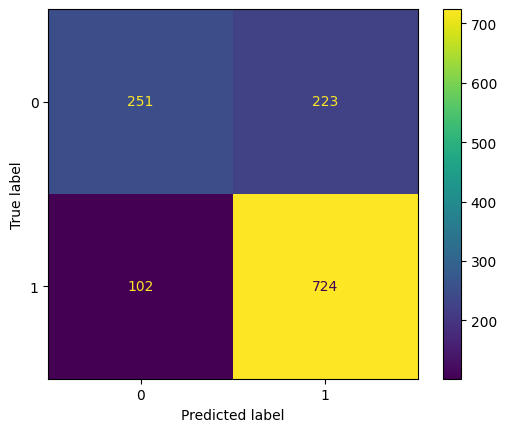

In [74]:
clf = SVC(random_state = 0)
clf.fit(xtrain, ytrain)
predictions = clf.predict(xtest)
cm = confusion_matrix(ytest, predictions, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

In [75]:
print(metrics.classification_report(ytest, models[1].predict(xtest)))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       474
           1       0.84      0.87      0.85       826

    accuracy                           0.81      1300
   macro avg       0.80      0.79      0.79      1300
weighted avg       0.81      0.81      0.81      1300

